In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("problems_ice.csv", delimiter=";")

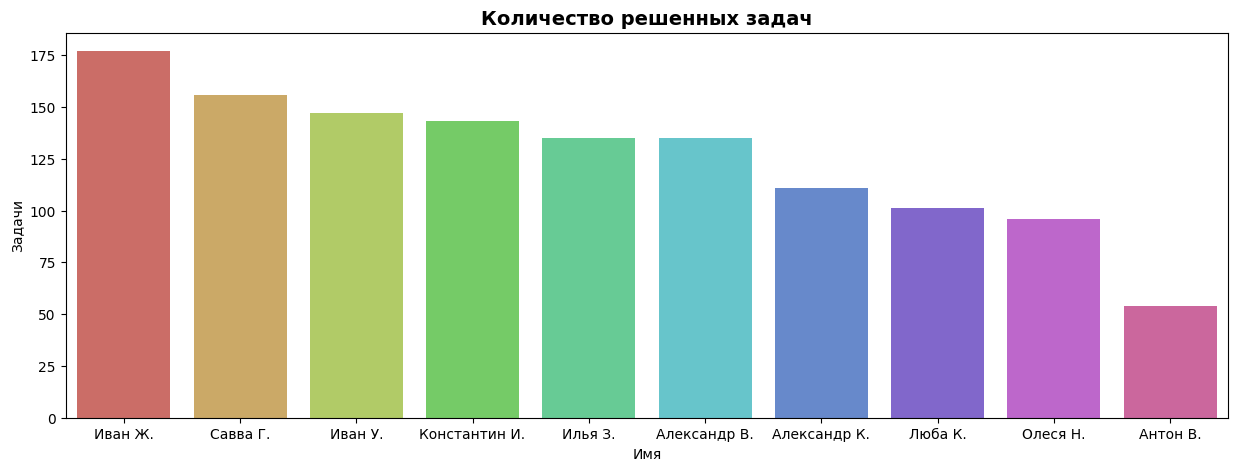

In [2]:
total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Задачи").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=14)
sns.barplot(total_problems, x="Имя", y="Задачи", palette="hls", hue="Имя")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

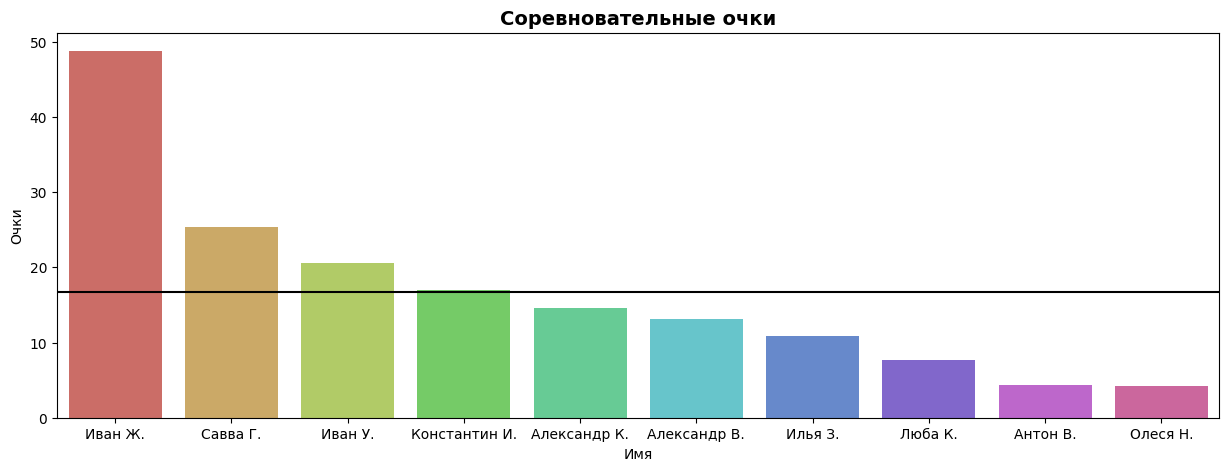

In [3]:
comp_points = an.competative_points(df, weight_func = "sigm").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.axhline(comp_points["Очки"].mean(), c="black")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

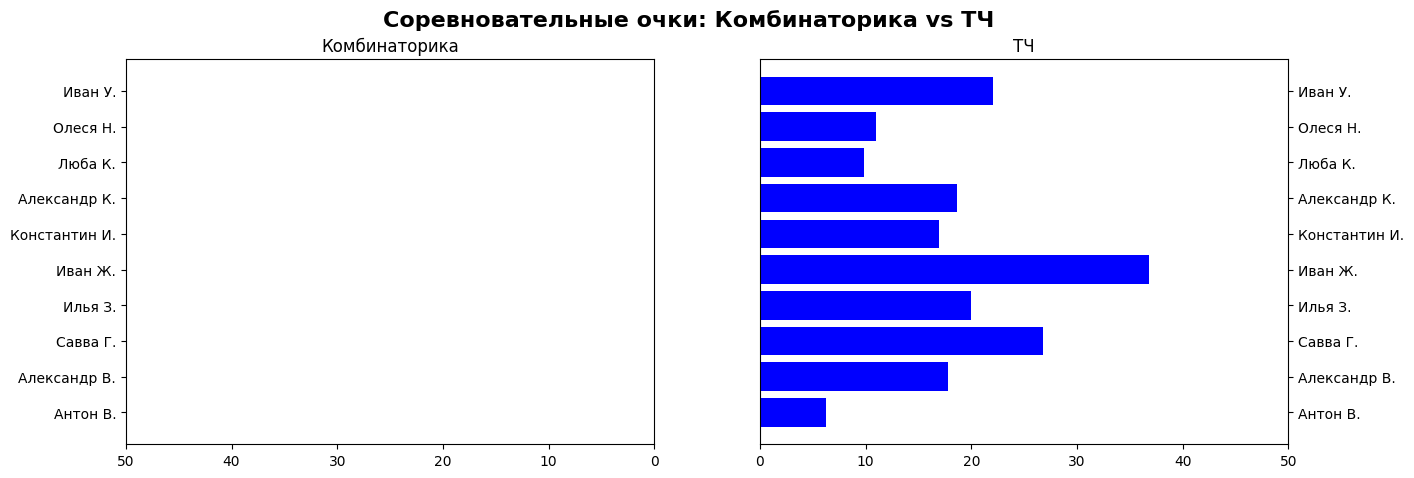

In [4]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([50, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 50])



plt.show()

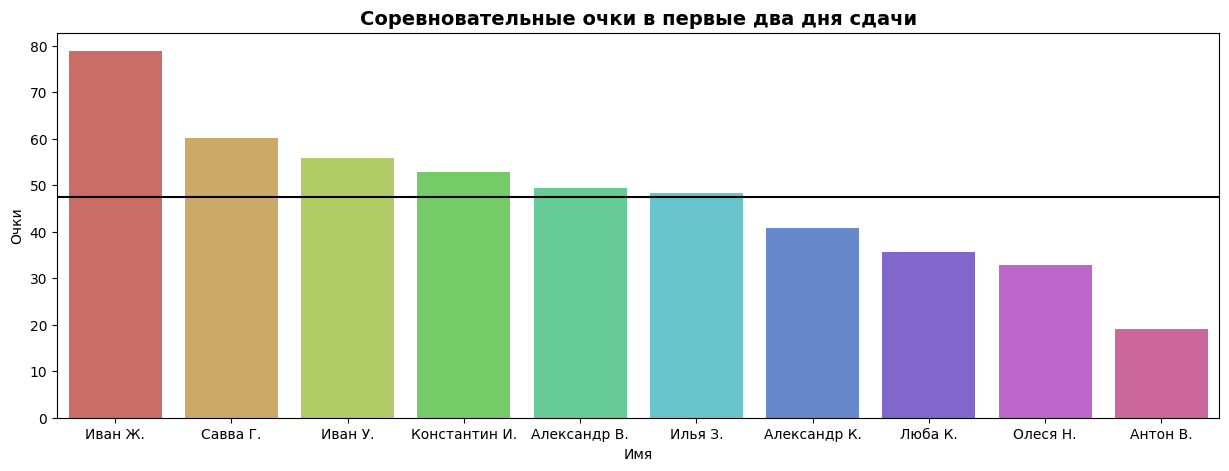

In [5]:
start_comp_points = an.competative_points(df, days=[1,2], weight_func='sqrt').sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки в первые два дня сдачи", weight="heavy", size=14)
sns.barplot(start_comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.axhline(start_comp_points["Очки"].mean(), c="black")
plt.show()

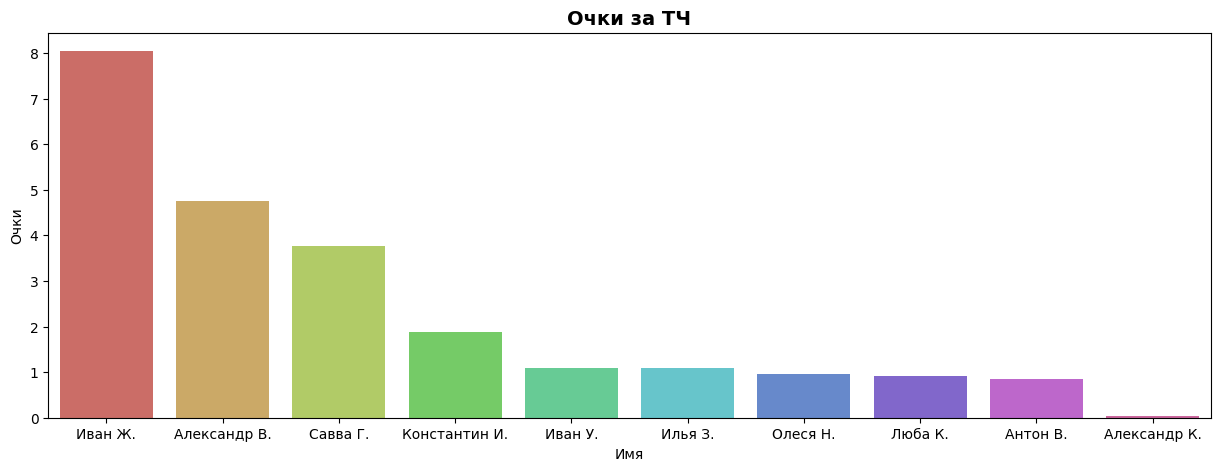

In [12]:
comp_points = an.competative_points(df, weight_func='sigm', topic="Графы").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Очки за ТЧ", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
#plt.axhline(comp_points["Очки"].mean())
plt.show()

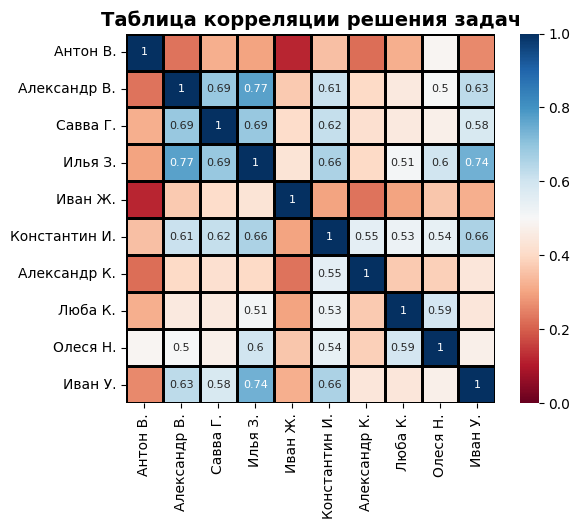

In [7]:
df1 = an.bin_conduit(an.topic_loc(df))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    vmin = 0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.title("Таблица корреляции решения задач", weight="heavy", size=14)

plt.show()

In [8]:
stats = an.stats(df, topics=["ТЧ", "Алгебра", "Графы", "Другое"])
stats

,Соревновательные очки,Среднее кол-во очков за задачу,Соревновательные очки в ТЧ,Среднее кол-во очков за задачу в ТЧ,Соревновательные очки в Алгебра,Среднее кол-во очков за задачу в Алгебра,Соревновательные очки в Графы,Среднее кол-во очков за задачу в Графы,Соревновательные очки в Другое,Среднее кол-во очков за задачу в Другое
Антон В.,4.355009,0.080648,0.831985,0.043789,2.005106,0.222790,0.842735,0.046819,0.675182,0.084398
Александр В.,13.126883,0.097236,4.374155,0.089268,2.039264,0.050982,4.761160,0.144278,1.952304,0.150177
Савва Г.,25.411510,0.162894,16.059253,0.250926,3.074912,0.068331,3.765196,0.117662,2.512150,0.167477
Илья З.,10.928607,0.080953,6.919442,0.128138,0.612127,0.016109,1.086357,0.037461,2.310680,0.165049
Иван Ж.,48.747181,0.275408,28.344386,0.363390,5.576479,0.123922,8.043548,0.229816,6.782767,0.356988
Константин И.,16.945980,0.118503,4.158127,0.088471,6.596321,0.134619,1.884888,0.062830,4.306645,0.253332
Александр К.,14.565527,0.131221,7.954711,0.162341,5.255974,0.131399,0.048240,0.002680,1.306602,0.326650
Люба К.,7.706308,0.076300,2.621214,0.093615,2.826023,0.068927,0.906297,0.036252,1.352774,0.193253
Олеся Н.,4.166373,0.043400,1.574429,0.049201,0.211934,0.007064,0.966143,0.037159,1.413867,0.176733
Иван У.,20.527166,0.139641,10.352181,0.184860,6.592285,0.137339,1.086357,0.037461,2.496343,0.178310


In [11]:
an.personal_stats(stats, "Александр К.")

Александр К.
Соревновательные очки: 14.57, #5
Среднее кол-во очков за задачу: 0.13, #4
Соревновательные очки в ТЧ: 7.95, #4
Среднее кол-во очков за задачу в ТЧ: 0.16, #4
Соревновательные очки в Алгебра: 5.26, #4
Среднее кол-во очков за задачу в Алгебра: 0.13, #4
Соревновательные очки в Графы: 0.05, #10
Среднее кол-во очков за задачу в Графы: 0.0, #10
Соревновательные очки в Другое: 1.31, #9
Среднее кол-во очков за задачу в Другое: 0.33, #2
